BLG 307 - YAPAY ZEKA SİSTEMLERİ PROJE TESLİMİ:

Adınız: Ali

Soyadınız: Uçma

Okul Numaranız: 2212721007

GitHub Repo Bağlantısı: https://github.com/Alu0320/genetik_optimizasyon


In [16]:
import numpy as np
import random

def y_hesapla(birey):
    """
    Amaç fonksiyonunu hesaplar: y = 3x₁ + 2x₂ + x₁x₂ - 0.5x₂² (Test Hassasiyeti Puanı)
    birey[0] = x1, birey[1] = x2
    """
    x1 = birey[0]
    x2 = birey[1]
    return 3*x1 + 2*x2 + x1*x2 - 0.5 * (x2**2)

# Rulet ve Rank seçim fonksiyonları
def rulet_secimi(populasyon, uygunluklar, adet=2):
    # ... (Orijinal kod yapısını korur)
    toplam = np.sum(uygunluklar)
    olasiliklar = uygunluklar / toplam
    secilen_indeksler = np.random.choice(len(populasyon), size=adet, p=olasiliklar)
    return populasyon[secilen_indeksler]

def rank_temelli_secim(populasyon, uygunluklar, adet=2):
    # ... (Orijinal kod yapısını korur)
    N = len(populasyon)
    sirali_indeksler = np.argsort(-uygunluklar)
    payda = N * (N + 1) / 2
    secim_ihtimalleri = np.array([(N - i) / payda for i in range(N)])
    ihtimaller = np.zeros_like(secim_ihtimalleri)
    for i, idx in enumerate(sirali_indeksler):
        ihtimaller[idx] = secim_ihtimalleri[i]
    secilen_indeksler = np.random.choice(N, size=adet, p=ihtimaller)
    return populasyon[secilen_indeksler]

# Çaprazlama ve Mutasyon fonksiyonları
def tek_noktali_caprazlama(p1, p2):
    nokta = random.randint(1, len(p1)-1)
    return np.concatenate((p1[:nokta], p2[nokta:])), np.concatenate((p2[:nokta], p1[nokta:]))

def iki_noktali_caprazlama(p1, p2):
    # Birey boyutu 2 olduğu için tek nokta gibi davranır.
    if len(p1) < 3:
        return tek_noktali_caprazlama(p1, p2)
    n1, n2 = sorted(random.sample(range(1, len(p1)), 2))
    return np.concatenate((p1[:n1], p2[n1:n2], p1[n2:])), np.concatenate((p2[:n1], p1[n1:n2], p2[n2:]))

def mutasyon_uygula(birey, ihtimal, buyukluk):
    yeni = birey.copy()
    for i in range(len(yeni)):
        if np.random.rand() < ihtimal:
            degisim = buyukluk * (np.random.rand() - 0.5)
            yeni[i] += degisim
    return np.round(yeni, 1)

def kısıt_kontrol(birey):
    """
    Senaryo 7 kısıtlarını kontrol eder ve ihlal sayısını döndürür.
    """
    ceza = 0
    x1, x2 = birey[0], birey[1]

    # Kısıt 1: x1 in [10, 80]
    if not (10 <= x1 <= 80): ceza += 1

    # Kısıt 2: x2 in [10, 80]
    if not (10 <= x2 <= 80): ceza += 1

    # Kısıt 3: x1 + x2 <= 100
    if x1 + x2 > 100: ceza += 1

    return ceza

def uygunluk_hesapla(birey):
    """
    Amaç fonksiyonu değerini (y) hesaplar ve kısıt ihlallerine göre ceza uygulayarak uygunluk skorunu döndürür.
    Uygunluk = y_hesapla - (ihlal_sayısı * 50)
    """
    y_tahmin = y_hesapla(birey)
    ceza_sayisi = kısıt_kontrol(birey)
    ceza = ceza_sayisi * 50

    uygunluk = y_tahmin - ceza

    # Rulet tekeri için pozitif uygunluk değerini garantile
    return max(1e-6, uygunluk)

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

def y_hesapla(birey):
    """
    Amaç fonksiyonunu hesaplar: y = 3x₁ + 2x₂ + x₁x₂ - 0.5x₂² (Test Hassasiyeti Puanı)
    birey[0] = x1, birey[1] = x2
    """
    x1 = birey[0]
    x2 = birey[1]
    return 3*x1 + 2*x2 + x1*x2 - 0.5 * (x2**2)

# Rulet ve Rank seçim fonksiyonları
def rulet_secimi(populasyon, uygunluklar, adet=2):
    toplam = np.sum(uygunluklar)
    olasiliklar = uygunluklar / toplam
    secilen_indeksler = np.random.choice(len(populasyon), size=adet, p=olasiliklar)
    return populasyon[secilen_indeksler]

def rank_temelli_secim(populasyon, uygunluklar, adet=2):
    N = len(populasyon)
    sirali_indeksler = np.argsort(-uygunluklar)
    payda = N * (N + 1) / 2
    secim_ihtimalleri = np.array([(N - i) / payda for i in range(N)])
    ihtimaller = np.zeros_like(secim_ihtimalleri)
    for i, idx in enumerate(sirali_indeksler):
        ihtimaller[idx] = secim_ihtimalleri[i]
    secilen_indeksler = np.random.choice(N, size=adet, p=ihtimaller)
    return populasyon[secilen_indeksler]

# Çaprazlama ve Mutasyon fonksiyonları
def tek_noktali_caprazlama(p1, p2):
    nokta = random.randint(1, len(p1)-1)
    return np.concatenate((p1[:nokta], p2[nokta:])), np.concatenate((p2[:nokta], p1[nokta:]))

def iki_noktali_caprazlama(p1, p2):
    # Birey boyutu 2 olduğu için tek nokta gibi davranır.
    if len(p1) < 3:
        return tek_noktali_caprazlama(p1, p2)
    n1, n2 = sorted(random.sample(range(1, len(p1)), 2))
    return np.concatenate((p1[:n1], p2[n1:n2], p1[n2:])), np.concatenate((p2[:n1], p1[n1:n2], p2[n2:]))

def mutasyon_uygula(birey, ihtimal, buyukluk):
    yeni = birey.copy()
    for i in range(len(yeni)):
        if np.random.rand() < ihtimal:
            degisim = buyukluk * (np.random.rand() - 0.5)
            yeni[i] += degisim
    return np.round(yeni, 1)

def kısıt_kontrol(birey):
    """
    Senaryo 7 kısıtlarını kontrol eder ve ihlal sayısını döndürür.
    """
    ceza = 0
    x1, x2 = birey[0], birey[1]

    # Kısıt 1: x1 in [10, 80]
    if not (10 <= x1 <= 80): ceza += 1

    # Kısıt 2: x2 in [10, 80]
    if not (10 <= x2 <= 80): ceza += 1

    # Kısıt 3: x1 + x2 <= 100
    if x1 + x2 > 100: ceza += 1

    # Kısıt 4 (Yeni!): x1 >= 25
    if x1 < 25: ceza += 1 # 25'ten küçükse ihlal var

    return ceza

def uygunluk_hesapla(birey):
    """
    Amaç fonksiyonu değerini (y) hesaplar ve kısıt ihlallerine göre ceza uygulayarak uygunluk skorunu döndürür.
    GÜNCELLEME: Ceza katsayısı artırıldı (50 -> 5000).
    Uygunluk = y_hesapla - (ihlal_sayısı * 5000)
    """
    y_tahmin = y_hesapla(birey)
    ceza_sayisi = kısıt_kontrol(birey)

    # DÜZELTME BURADA: Ceza 50'den 5000'e çıkarıldı.
    # Böylece kısıt ihlali yapan (toplamı 100'ü geçen) bireylerin skoru negatif olur ve elenir.
    ceza = ceza_sayisi * 5000

    uygunluk = y_tahmin - ceza

    # Rulet tekeri hatası vermesin diye min 1e-6 döndürülür
    return max(1e-6, uygunluk)

def evrimsel_algoritma(populasyon, nesil_sayisi,
                       caprazlama_turu, secim_turu, mutasyon_ihtimali, mutasyon_buyuklugu):

    en_iyiler = []

    for nesil in range(nesil_sayisi):
        print(f"\n🔁 NESİL {nesil+1}")

        uygunluklar = np.array([uygunluk_hesapla(b) for b in populasyon])
        uygunluklar = np.clip(uygunluklar, 1e-6, None)

        en_iyi_indeks = np.argmax(uygunluklar)
        elit_birey = populasyon[en_iyi_indeks].copy()
        elit_uygunluk = uygunluklar[en_iyi_indeks]
        en_iyiler.append(elit_uygunluk)

        tahmini_y = y_hesapla(elit_birey)

        print("Uygunluklar:", np.round(uygunluklar, 1))

        # Eşleme Havuzu Oluşturma (Seçim)
        havuz = []
        for _ in range(len(populasyon) // 2):
            if secim_turu == "rulet":
                ebeveynler = rulet_secimi(populasyon, uygunluklar)
            elif secim_turu == "rank":
                ebeveynler = rank_temelli_secim(populasyon, uygunluklar)
            else:
                raise ValueError("Seçim türü 'rulet' veya 'rank' olmalı.")
            havuz.append(ebeveynler)

        yeni_bireyler = [elit_birey] # Elitizm

        # Yeni Nesil Oluşturma (Çaprazlama ve Mutasyon)
        while len(yeni_bireyler) < len(populasyon):
            p1, p2 = np.array(random.choice(havuz))
            if caprazlama_turu == "tek":
                c1, c2 = tek_noktali_caprazlama(p1, p2)
            elif caprazlama_turu == "iki":
                c1, c2 = iki_noktali_caprazlama(p1, p2)
            else:
                raise ValueError("Çaprazlama türü 'tek' veya 'iki' olmalı.")

            c1 = mutasyon_uygula(c1, mutasyon_ihtimali, mutasyon_buyuklugu)
            c2 = mutasyon_uygula(c2, mutasyon_ihtimali, mutasyon_buyuklugu)
            yeni_bireyler.extend([c1, c2])

        populasyon = np.array(yeni_bireyler[:len(populasyon)])

        print("\n🏆 En iyi Birey (x₁, x₂):", np.round(elit_birey, 1))
        print(f"🎯 Tahmini y' (Hassasiyet Puanı): {tahmini_y.round(2)}")
        print(f"🏅 Uygunluk (Ceza Düşülmüş): {round(elit_uygunluk, 4)}")

        if nesil > 0 and elit_uygunluk > en_iyiler[-2]:
            print("🚀 İyileşme: Uygunluk arttı!")
        elif nesil > 0:
            print("📉 İyileşme yok.")


    # Uygunluk grafiği
    plt.figure(figsize=(10, 6))
    plt.plot(en_iyiler, marker='o', linestyle='-', color='b')
    plt.title("Genetik Algoritma - En İyi Uygunluk Değeri (Fitness) Değişimi")
    plt.xlabel("Nesil")
    plt.ylabel("Uygunluk (Fitness)")
    plt.grid(True)
    plt.show()

⚙️ Algoritma Parametreleri:
   Senaryo: Laboratuvarda Numune Karışımı (MAKSİMİZASYON)
   Amaç: y = 3x₁ + 2x₂ + x₁x₂ - 0.5x₂² Maksimizasyonu
   Kısıtlar: x₁∈[25,80], x₂∈[10,80], x₁+x₂≤100
   Nesil Sayısı: 20
   Çaprazlama Türü: tek
   Seçim Türü: rank
   Mutasyon İhtimali: 0.4
   Mutasyon Büyüklüğü: 1.0



🔁 NESİL 1
Uygunluklar: [   0.  1837.5    0.  1500.     0.     0. ]

🏆 En iyi Birey (x₁, x₂): [75. 25.]
🎯 Tahmini y' (Hassasiyet Puanı): 1837.5
🏅 Uygunluk (Ceza Düşülmüş): 1837.5

🔁 NESİL 2
Uygunluklar: [1837.5    0.     0.     0.     0.     0. ]

🏆 En iyi Birey (x₁, x₂): [75. 25.]
🎯 Tahmini y' (Hassasiyet Puanı): 1837.5
🏅 Uygunluk (Ceza Düşülmüş): 1837.5
📉 İyileşme yok.

🔁 NESİL 3
Uygunluklar: [1837.5    0.     0.  1140.3    0.     0. ]

🏆 En iyi Birey (x₁, x₂): [75. 25.]
🎯 Tahmini y' (Hassasiyet Puanı): 1837.5
🏅 Uygunluk (Ceza Düşülmüş): 1837.5
📉 İyileşme yok.

🔁 NESİL 4
Uygunluklar: [1837.5 1837.5    0.     0.  1837.5 1813.9]

🏆 En iyi Birey (x₁, x₂): [75. 25.]
🎯 Tahmini y' (Hassasi

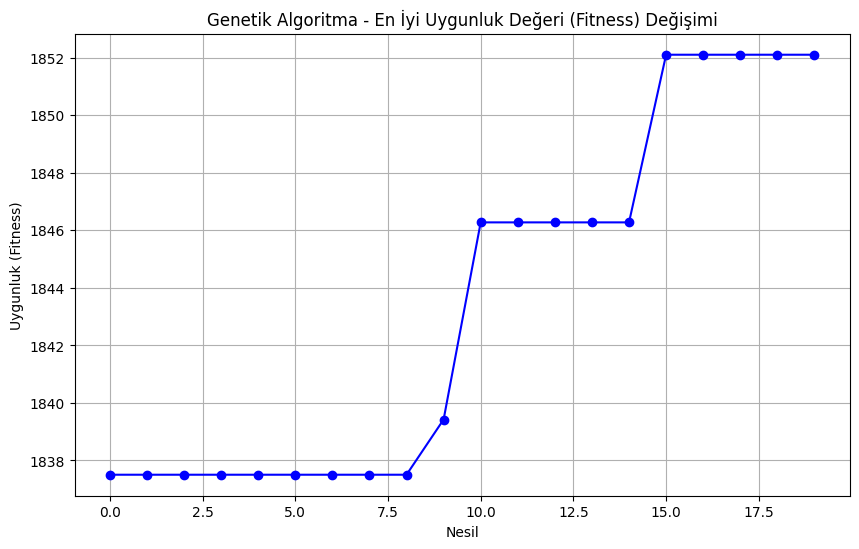

In [18]:
import numpy as np

# 🔢 Başlangıç popülasyonu (6 birey, 2 gen: x1 ve x2)
# Kısıt ihlali olan ve olmayan bireyler içerir.
populasyon = np.array([
    [20.0, 30.0],  # x1+x2=50 (uygun)
    [75.0, 25.0],  # x1+x2=100 (uygun)
    [10.0, 85.0],  # x2 ihlali (Ceza alacak)
    [50.0, 50.0],  # x1+x2=100 (uygun)
    [5.0,  50.0],  # x1 ihlali (Ceza alacak)
    [60.0, 60.0]   # x1+x2 ihlali (Ceza alacak)
])

# ⚙️ Sabit Parametreler:
nesil_sayisi = 20
caprazlama_turu = "tek"
secim_turu = "rank"
mutasyon_ihtimali = 0.4
mutasyon_buyuklugu = 1.0

print(f"⚙️ Algoritma Parametreleri:")
print(f"   Senaryo: Laboratuvarda Numune Karışımı (MAKSİMİZASYON)")
print(f"   Amaç: y = 3x₁ + 2x₂ + x₁x₂ - 0.5x₂² Maksimizasyonu")
print(f"   Kısıtlar: x₁∈[25,80], x₂∈[10,80], x₁+x₂≤100")
print(f"   Nesil Sayısı: {nesil_sayisi}")
print(f"   Çaprazlama Türü: {caprazlama_turu}")
print(f"   Seçim Türü: {secim_turu}")
print(f"   Mutasyon İhtimali: {mutasyon_ihtimali}")
print(f"   Mutasyon Büyüklüğü: {mutasyon_buyuklugu}")
print("\n" + "="*70 + "\n")


# 🚀 Algoritmayı çalıştır
evrimsel_algoritma(
    populasyon=populasyon,
    nesil_sayisi=nesil_sayisi,
    caprazlama_turu=caprazlama_turu,
    secim_turu=secim_turu,
    mutasyon_ihtimali=mutasyon_ihtimali,
    mutasyon_buyuklugu=mutasyon_buyuklugu
)